In [ ]:
# List 4 Exercise 2: Generating random numbers from the Mawell-Boltzmann distribution

We use the elimination method and the exponential distribution

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [100]:
def c(Lambda_table):
  Lambda = Lambda_table#[0]
  x_0 = (Lambda + np.sqrt(Lambda**2 + 16))/4
  c_value = 4 / np.sqrt(np.pi)/ Lambda * x_0**2 * np.exp(-x_0**2 + Lambda * x_0)
  return c_value

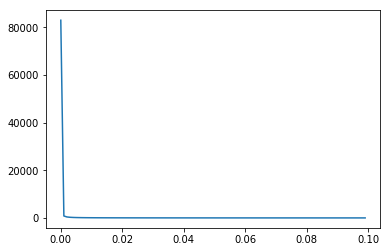

In [101]:
import pandas as pd
x_temp = np.arange(1e-5,0.1,1e-3)
y_temp = pd.Series(x_temp).apply(c)
plt.plot(x_temp, y_temp)
plt.show()

In [102]:
def positiveLambda(Lambda):
  return Lambda[0]>0

In [107]:
Lambda_init = [1e-5]

In [108]:
# con1 = {'type': 'ineq'}
bounds = ((10**-6, 10.),)

In [109]:
solution = minimize(c, Lambda_init, method='TNC', bounds=bounds)

In [110]:
solution

     fun: array([ 2.51463353])
     jac: array([  1.62980740e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 35
     nit: 12
  status: 1
 success: True
       x: array([ 0.81650018])

In [112]:
pd.Series(0.81).apply(lambda Lambda: (Lambda + np.sqrt(Lambda**2 + 16))/4)

0    1.222797
dtype: float64

In [113]:
np.sqrt(3/2)

1.2247448713915889

In [114]:
results_standard = pd.read_csv('R2/R2ORoom1e6.csv')

In [115]:
m = 2*2.6566862*10**-26
T = 300
k = 1.38064852e-23
A = np.sqrt(m/2/k/T)
print(A)

0.00253260778032


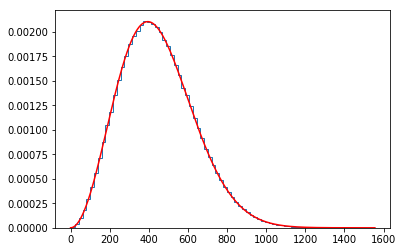

In [123]:
x = np.arange(0.,results_standard.X.max(),0.01)
y = pd.Series(x).apply(lambda p: A**3*4*p**2*np.exp(-(A*p)**2)/np.sqrt(np.pi))
plt.plot(x,y, c='red')
plt.hist(results_standard.X, bins=80, normed=True, histtype='step')
# results_standard.X.plot.hist(bins=30, density=True)
plt.show()

In [119]:
results_standard.describe()

,X
count,1000000.000000
mean,445.644104
std,188.064477
min,3.634950
25%,307.490750
50%,429.657000
75%,566.276500
max,1555.930000
